In [3]:
# Итоговое задание
### вариант № 2   Лила.В.Я
### группа: РИМ-101211    

In [4]:

import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import api as tsa
import scipy.stats as stats
from scipy import signal
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import pandas as pd
import h5py
import pywt


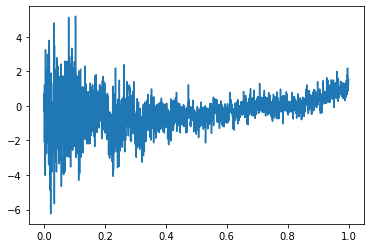

In [47]:
# Загржаем исходные данные согласно варианту № 2
X = np.loadtxt('./files/2.txt')
t = np.linspace(0, 1, X.size)

plt.plot(t,X)
plt.show()

In [6]:
# Оценим мат. ожидание, дисперсию ВР.
print('Мат. ожидание', np.mean(X))
print('Дисперсия', np.var(X))

Мат. ожидание -0.2831499368686869
Дисперсия 0.891324285284087


In [7]:
# Оценим стационарность временного ряда KPSS тестом.
# Стационарные ВР - такие временные ряды, элементы которых являются случайными величинами с постоянным математическим ожиданием и постоянной дисперсией. 
# Если KPSS-test в статистике близок к 0, то временной ряд является стационарным по КПСС-тесту, то есть нулевая гипотеза о тренд-стационарности ряда принята. 
# Более точный показатель, на который следует обратить внимание – это p-value. Он, чаще всего, трактуется следующим образом: если значение p-value меньше 0.05, то нулевая гипотеза отклоняется. Если значение больше 0.05, то нулевая гипотеза принимается. 

print(tsa.kpss(X))

(5.443122279053782, 0.01, 29, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Наш показатель p-value равен 0,01 и значение kpss-теста не близко к 0 - значит нулевая гипотеза отвергается. 
## Данныей ряд не стационарный.

Если ряд является нестационарным, то абсолютно все оценки, как автокорреляционные, так и спектральные, теряют свой смысл. Поэтому, если ВР был определен как нестационарный, ни один из перечисленных выше подходов будет, формально, не применим. Дискретные выражения могут быть использованы, но для НВР они будут служить чем-то вроде «средней температуры по больнице»

Построение спектрограммы периодограммы и периода не имеет смысла.

# Постройте наиболее подходящий тренд для данных.

B0: -0.920122888318336       B1: 1.2739459028992983


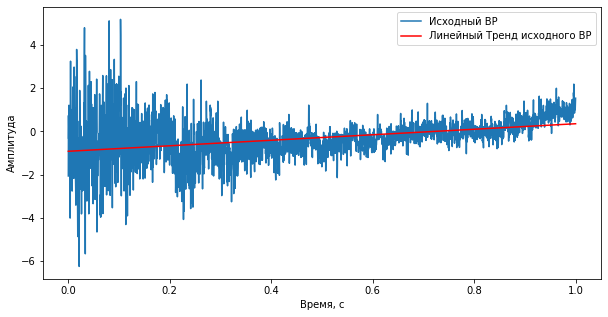

In [8]:
# Линейный тренд
Y = np.vstack([np.ones(len(t)),t]).T # добавляем столбец единиц в массив времени
B = np.linalg.lstsq(Y,X,rcond=-1) #  решение системы уравнений

plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')
print('B0:',B[0][0],'     ','B1:',B[0][1])
plt.plot(t,B[0][0]+B[0][1]*t,'r',label='Линейный Тренд исходного ВР')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

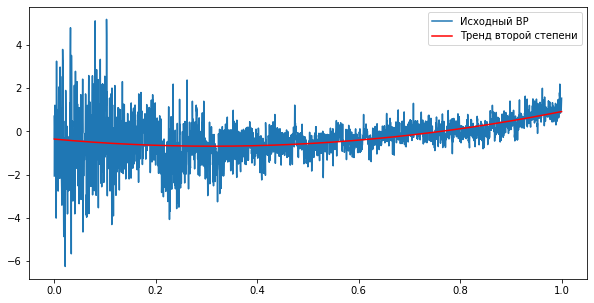

In [9]:
plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')

def func(t, b0, b1,b2):
    return b0+b1*t+b2*t*t

popt2, pcov2 = curve_fit(func, t, X)
plt.plot(t, popt2[0]+popt2[1]*t+popt2[2]*t*t,'r',label='Тренд второй степени')
plt.legend()
plt.show()

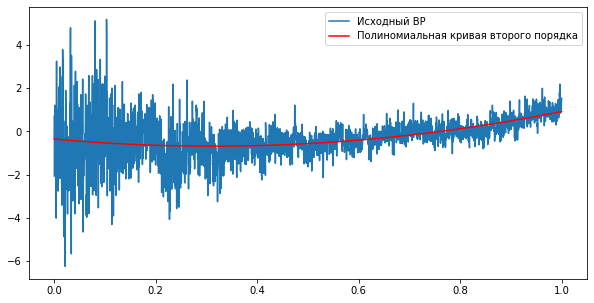

In [10]:
bb = np.polyfit(t,X,2) 
plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')
plt.plot(t,bb[2]+bb[1]*t+bb[0]*t*t,'r',label='Полиномиальная кривая второго порядка')
plt.legend()
plt.show()

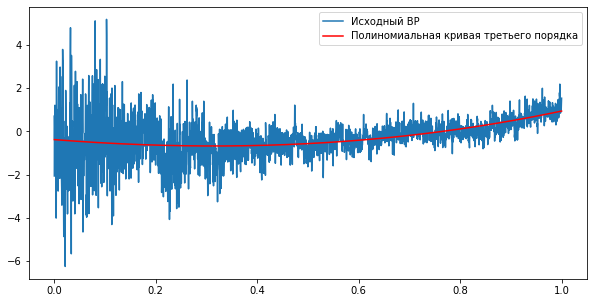

In [11]:
bb = np.polyfit(t,X,3)
plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')
plt.plot(t,bb[3]+bb[2]*t+bb[1]*t*t+bb[0]*t*t*t,'r',label='Полиномиальная кривая третьего порядка')
plt.legend()
plt.show()

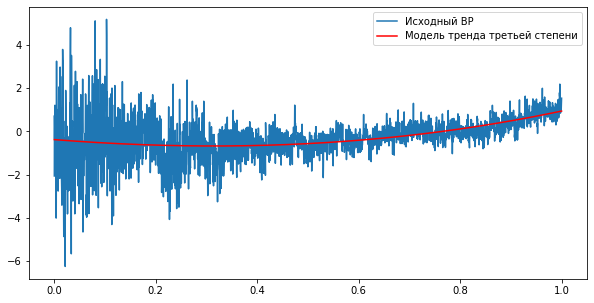

In [12]:
plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')

def func(t, b0, b1,b2,b3):
    return b0+b1*t+b2*t*t+b3*t*t*t

popt3, pcov3 = curve_fit(func, t, X)
plt.plot(t, popt3[0]+popt3[1]*t+popt3[2]*t*t+popt3[3]*t*t*t,'r',label='Модель тренда третьей степени')
plt.legend()
plt.show()


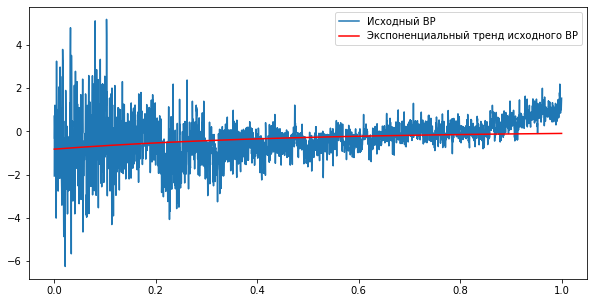

In [13]:
plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')

def func(t, b0, b1):
    return b0*np.exp(b1*t) 

popt_exp, pcov_exp = curve_fit(func, t, X)
Z = np.zeros(len(t))
for i in range(len(t)):
    Z[i] = popt_exp[0]*np.exp(popt_exp[1]*t[i])

plt.plot(t, Z,'r',label='Экспоненциальный тренд исходного ВР')
plt.legend()
plt.show()

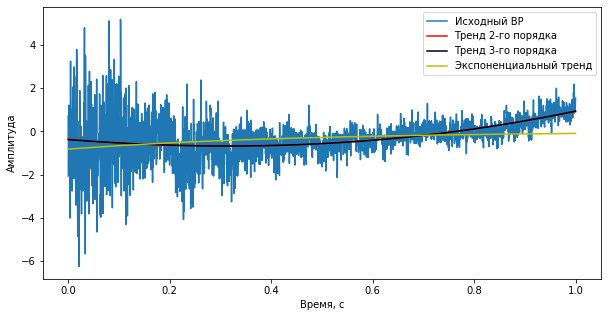

In [14]:
#### Изобразим все тренды на одном графике

plt.figure(figsize=(10,5))
plt.plot(t,X,label='Исходный ВР')
# plt.plot(t,popt[0]+popt[1]*t,'r',label='Тренд 1-го порядка')
plt.plot(t, popt2[0]+popt2[1]*t+popt2[2]*t*t,'r',label='Тренд 2-го порядка')
plt.plot(t, popt3[0]+popt3[1]*t+popt3[2]*t*t+popt3[3]*t*t*t,'k',label='Тренд 3-го порядка')
plt.plot(t, Z,'y',label='Экспоненциальный тренд')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

# Вывод: Лучше всего подходит Тренд 2 и 3его порядка.

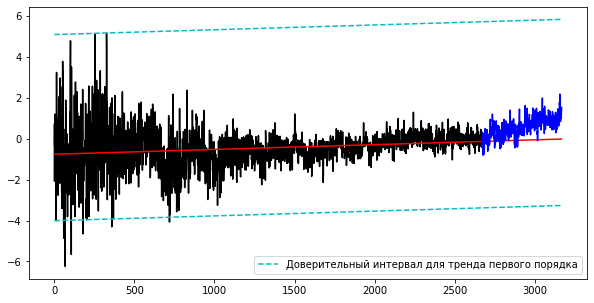

In [45]:
# Построение прогноза с помощью методов регресии

a = 500 # Количество точек прогноза
Z = X[:len(X)-a+1]

t1=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t1=t.reshape(-1,1)
t0=np.arange(0, len(X), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)

ordered = np.sort(Z) # сортировка ВР 
alpha = 0.95

lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))

bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1) 
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t1, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-a:], X[-a:], 'b')

plt.plot(t0, p(t0)+upper, 'c--',label='Доверительный интервал для тренда первого порядка')
plt.plot(t0, p(t0)-lower, 'c--')
plt.legend()
plt.show()

# Постройте прогноз данных с помощью ARIMA модели

In [16]:
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.

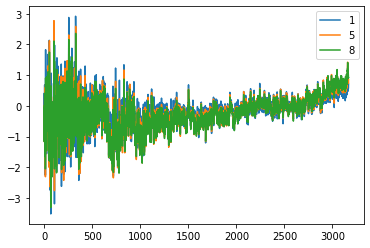

In [36]:
arima1 = ARIMA(X, order = (1, 0, 0))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(X, order = (5, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(X, order = (8, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='5')
plt.plot(model_fit3.fittedvalues, label='8')
plt.legend()
plt.show()

In [37]:
arimaz = ARIMA(X, order = (16, 0, 0)) 
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 

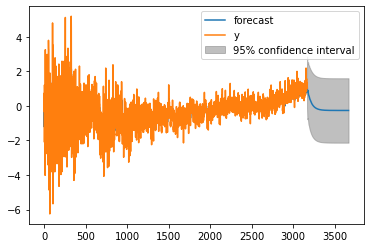

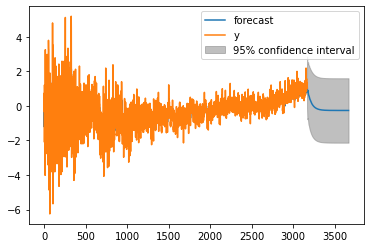

In [40]:
model_fit.plot_predict(0, len(X)+a)

In [20]:
# Модель ARIMA совершеннно не подходит для данного ВР. Прогноз получается одинаково плохим, не смотря на любые коэфициенты


In [21]:
# Постром тренд с помощью методов вейвлет-анализа (п.7)


In [38]:
wvlt = pywt.Wavelet('db8')
print('Декомпозиция вейвлета до уровня:', pywt.dwt_max_level(len(X), wvlt))

Декомпозиция вейвлета до уровня: 7


In [27]:
cA5,cD5,cD4,cD3,cD2, cD1 = pywt.wavedec(X, wvlt, mode='periodization', level=5)


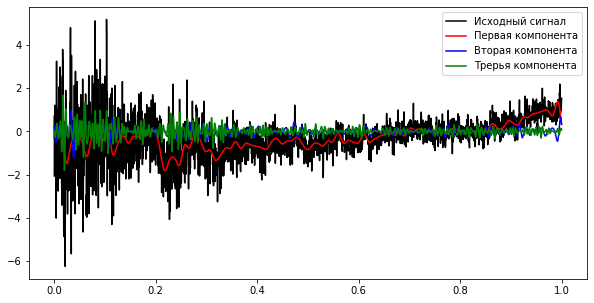

In [60]:
Comp1 = pywt.waverec((cA5, None, None, None, None, None), wvlt, mode='periodization')
Comp2 = pywt.waverec((None, cD5, None, None, None, None), wvlt, mode='periodization')
Comp3 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')

plt.figure(figsize = (10, 5))
plt.plot(t, X, 'k', label='Исходный сигнал')
plt.plot(t, Comp1, 'r', label='Первая компонента') 
plt.plot(t, Comp2, 'b', label='Вторая компонента') 
plt.plot(t, Comp3, 'g', label='Трерья компонента') 
plt.legend()
plt.show()

Все комбинации узлов, упорядоченные по их частотной ширине спектра:
['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


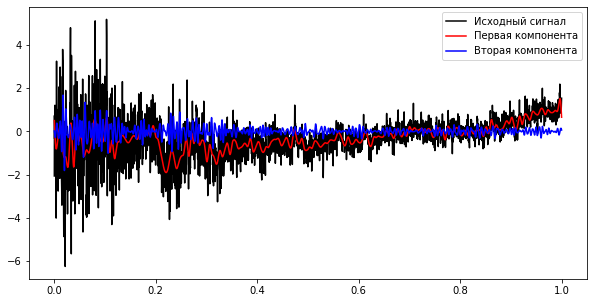

In [61]:
wp = pywt.WaveletPacket(data=X, wavelet='db8', mode='periodization')
print('Все комбинации узлов, упорядоченные по их частотной ширине спектра:')
print([node.path for node in wp.get_level(4, 'freq')])

wp = pywt.WaveletPacket(data=X, wavelet='db8', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='db8', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data
new_wp.reconstruct(update=True) 
reF1 = new_wp.data
new_wp = pywt.WaveletPacket(data=None, wavelet='db8', mode='periodization')
new_wp['aaad'] = wp['aaad'].data
new_wp.reconstruct(update=True) 
reF2 = new_wp.data 
plt.figure(figsize = (10, 5))
plt.plot(t, X, 'k', label='Исходный сигнал')
plt.plot(t, reF1, 'r', label='Первая компонента') 
plt.plot(t, reF2, 'b', label='Вторая компонента')
plt.legend()
plt.show()

In [86]:
# Постром тренд с помощью SSA

In [87]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    i=0
    while i<L:           # Заполнение данной матрицы точками массива
        X[i] = F[i:K+i]
        i+=1
        
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return A,U,V

def SSA_group(A, U, V, N, I):
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    L1 = min(L,K)
    K1 = max(L,K)

    for k in range(0, L1-1):
        C=0
        for m in range(0,k+1):
            C = C+Z[m][k-m]
        G[k]=C/(k+1)
        
    for k in range(L1-1, K1):
        C=0
        for m in range(0,L1):
            C = C+Z[m][k-m]
        G[k] = C/L1
        
    for k in range(K1,N):
        C=0
        for m in range(k-K1+1,N-K1+1):
            C = C+Z[m][k-m]
        G[k] = C/(N-k)
    
    return G


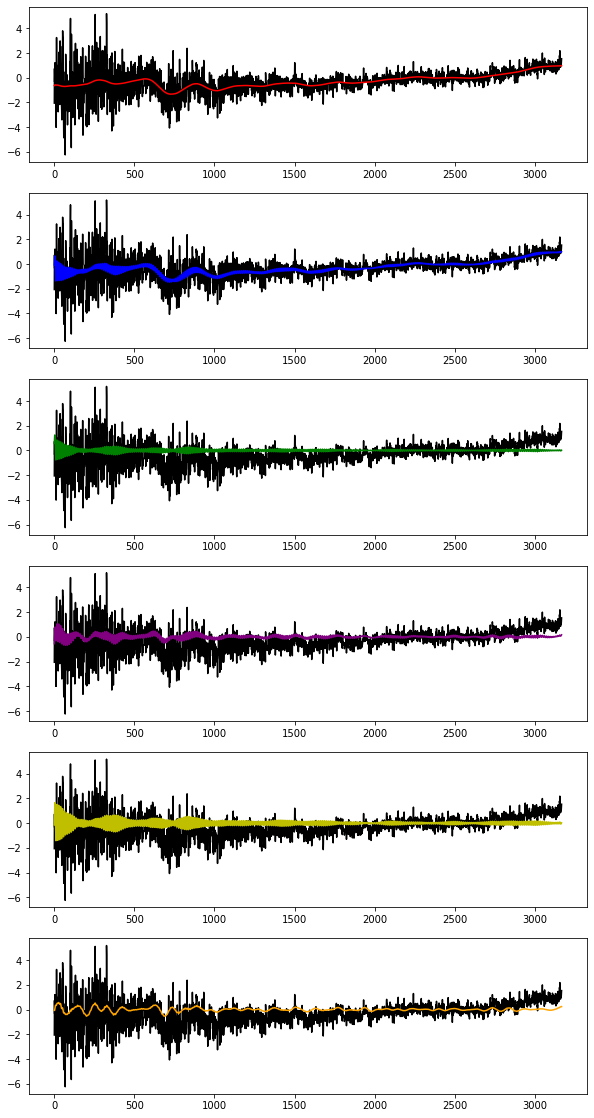

In [90]:
A, U, V = SSA_modes(X, 100)
F1 = SSA_group(A, U, V, len(X), [0, 1, 2,3,4,5,6])
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(X), [0])
plt.subplot(6,1,1)
plt.plot(X, 'k')
plt.plot(F1_0, 'r')
 
F1_1 = SSA_group(A, U, V, len(X), [0,1])
plt.subplot(6,1,2)
plt.plot(X, 'k')
plt.plot(F1_1, 'b')
 
F1_2 = SSA_group(A, U, V, len(X), [1])
plt.subplot(6,1,3)
plt.plot(X, 'k')
plt.plot(F1_2, 'g')
 

F1_01 = SSA_group(A, U, V, len(X), [2,3])
plt.subplot(6,1,4)
plt.plot(X, 'k')
plt.plot(F1_01, 'purple')
 

F1_02 = SSA_group(A, U, V, len(X), [1,2])
plt.subplot(6,1,5)
plt.plot(X, 'k')
plt.plot(F1_02, 'y')
 

F1_12 = SSA_group(A, U, V, len(X), [3,4])
plt.subplot(6,1,6)
plt.plot(X, 'k')
plt.plot(F1_12, 'orange')

plt.show()


In [ ]:
# Прогноз ряда с помощью рекурсивного метода SSA-R

In [84]:
def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, N, I)
    
    Q = np.zeros(N + M) # Увеличиваем матрицу Q на M прогнозируемых точек
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    
    for i in range(0, N):
        Q[i] = G[i]
        cccccccc
    for i in range(N, N + M - 1):
        A=0
        for j in range(0, L-2):
            A += R[j]*Q[i-j-1] 
        Q[i] = A                   
    
    return Q

In [91]:
def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, N, I)
    
    Q = np.zeros(N + M) # Увеличиваем матрицу Q на M прогнозируемых точек
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    
    for i in range(0, N):
        Q[i] = G[i]
        
    for i in range(N, N + M - 1):
        A=0
        for j in range(0, L-2):
            A += R[j]*Q[i-j-1] 
        Q[i] = A                   
    
    return Q

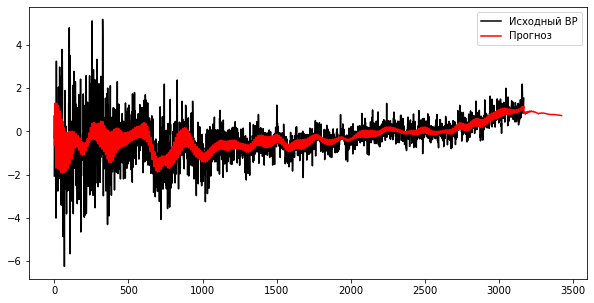

In [92]:
L = 100 # величина окна
M = 256 # количество прогнозируемых точек

Q = SSA_R(X, L, [0,1,2,3], M) # прогноз методом SSA-R

plt.figure(figsize = (10, 5))
plt.plot(X,'k',label='Исходный ВР')
plt.plot(Q[:len(Q)-1], 'r',label='Прогноз')
plt.legend()
plt.show()

In [ ]:
# Судя по графику тренда, и прогнозу, это вполне хороший прогноз

In [131]:
# Постром прогноз данных с помощью нейронной сети LSTM

In [132]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense      
from keras.layers import LSTM      
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.utils.vis_utils import plot_model

In [133]:
def NEIRO_NET(F, PR_T,PR_past,neir,pogr,epo):
    F_ras = np.array(F) # переводим исходный массив F в расчетный массив F_ras
    F_ras = F_ras.reshape(-1, 1) # делаем из одномерного масства двумерный

    scaler = MinMaxScaler(feature_range=(0, 1)) # подгоняет под масштаб по оси OY от 0 до 1
    F_ras = scaler.fit_transform(F_ras) # так как функция активации слоя LSTM корректно обрабатывает значения только в данном диапазоне
    F_tr = F_ras
    F_test = F_ras[len(F_ras)-PR_T-PR_past:]
    
    plt.figure(figsize = (10, 5))
    plt.plot(F_ras, 'k')
    plt.plot(np.r_[:len(F_ras)],F_tr, 'b')
    plt.plot(np.r_[len(F_ras)-PR_T-PR_past:len(F_ras)],F_test, 'r')
    plt.show()

    data_gen = TimeseriesGenerator(F_tr, F_tr, length=PR_past, sampling_rate=1, batch_size=len(F_ras))
    batch_0 = data_gen[0]
    x, y = batch_0 # вход и обучающий выход для сети
    print(x.shape) 
    xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
    yy=y
    print(xx.shape) # меняем местами размерности
    print(yy.shape) 
    
    model = Sequential() # слои соединены последовательно
    model.add(LSTM(units=neir, input_shape=(1, PR_past))) 
    model.add(Dense(units = 1)) # выход одномерный
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model = Sequential()
    model.add(LSTM(units=neir, return_sequences=True, input_shape=(1, PR_past)))
    model.add(Dropout(pogr))
    model.add(LSTM(units=neir, return_sequences=True))
    model.add(Dropout(pogr))
    model.add(LSTM(units=neir))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(xx, yy, epochs = epo)

    data_gen = TimeseriesGenerator(F_test, F_test, length=PR_past, sampling_rate=1,batch_size=len(F_ras)-PR_T)
    batch_0 = data_gen[0]
    x, y = batch_0
    xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
    yy = y
    print(xx.shape) 
    print(yy.shape) 
    
    return model,xx, scaler

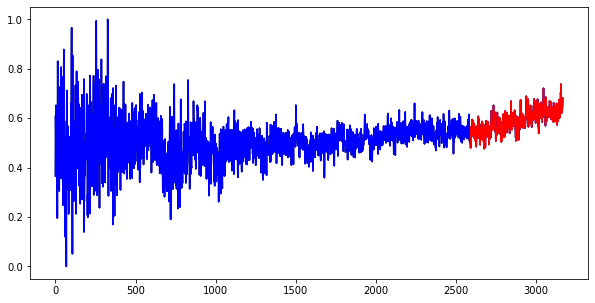

(3104, 64, 1)
(3104, 1, 64)
(3104, 1)
Epoch 1/100
97/97 [==============================] - 3s 5ms/step - loss: 0.0832
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 4/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 5/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 7/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 8/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 9/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 10/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 11/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 12/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0040

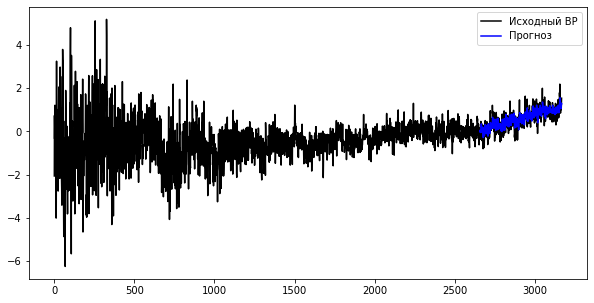

In [140]:
PR_T = 512 # Количество прогнозируемых точек
PR_past = 64 #  по скольким предыдущим точкам проводим обучение
neir = 100 # Количество нейронов в цепочке
pogr=0.01 # Допустимое отклонение 
epo = 100 # Количество эпох

model,xx, scaler = NEIRO_NET(X, PR_T ,PR_past, neir, pogr, epo)

predictValue = model.predict(xx)
predictValue = scaler.inverse_transform(predictValue)
plt.figure(figsize = (10, 5))
plt.plot(X, 'k',label='Исходный ВР')
plt.plot(np.r_[len(X)-PR_T:len(X)],predictValue, 'b',label='Прогноз')
plt.legend()
plt.show()